<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Preprocessing-publication" data-toc-modified-id="Preprocessing-publication-1">Preprocessing publication</a></span><ul class="toc-item"><li><span><a href="#publication.csv-revisited" data-toc-modified-id="publication.csv-revisited-1.1"><code>publication.csv</code> revisited</a></span></li><li><span><a href="#Apply-standard-preprocessing:" data-toc-modified-id="Apply-standard-preprocessing:-1.2">Apply standard preprocessing:</a></span></li><li><span><a href="#Distribution-of-length-of-summary" data-toc-modified-id="Distribution-of-length-of-summary-1.3">Distribution of length of summary</a></span></li></ul></li><li><span><a href="#Preprocessing-scrapped-PDF" data-toc-modified-id="Preprocessing-scrapped-PDF-2">Preprocessing scrapped <code>PDF</code></a></span></li></ul></div>

# Preprocessing publication 

In this notebook, I aim to detail the methods used for preprocessing the abstract and publications that will be part of the corpus used for topic modelling further down the pipeline.

Building on the dataset from the [preprocess-poinf.ipynb](../../../infnet-scrapper/notebooks/preprocess-poinf.ipynb), we further preprocess the additional details scrapped from Edinburgh research explorer. 

The main focus of [preprocess-poinf.ipynb](../../../infnet-scrapper/notebooks/preprocess-poinf.ipynb) is to preprocess the data collected from Edinburgh Research Explorer for . This notebook, on the other hand, focuses on the publications - the abstracts (if any) and publications/conferences that the research is presented in.

<s>This is a precursor to a full-blown LDA analysis on the PDF of the research (the research papers).</s> Refer to [preprocessing pdf2txt](#Preprocessing-scrapped-PDF)

## `publication.csv` revisited

I analyse the `publication.csv` dataset in this section.

In [1]:
import pandas as pd
import re

In [2]:
pub_csv = pd.read_csv('../data/publications.csv')
print 'pub_csv contains:', len(pub_csv), ' publications'
pub_csv.iloc[40:45] # sample the data

pub_csv contains: 8810  publications


,pub_id,date,year,title,authors,pub_url,doi_url,pdf_url,abstract,publications
40,f4293dd4-09a5-420b-b37a-2bd88d45c6e6,1 Jun 2007,2007,statistical postediting on systrans rulebased ...,loïc dugast|jean senellart|philipp koehn,http://www.research.ed.ac.uk/portal/en/publica...,UNKNOWN,http://www.research.ed.ac.uk/portal/files/1936...,this article describes the combination of a sy...,proceedings of the second workshop on statisti...
41,fc393df2-bf68-45cd-85ce-9faeb2c9d9b4,17 May 2017,2017,endtoend deep learning of optimization heuristics,christopher cummins|pavlos petoumenos|zheng wa...,http://www.research.ed.ac.uk/portal/en/publica...,UNKNOWN,http://www.research.ed.ac.uk/portal/files/3774...,accurate automatic optimization heuristics are...,the 26th international conference on parallel ...
42,c7a7fc62-2251-441c-86ac-9e0a0a0d39c9,2016,2016,a list of successes that can change the world ...,sam lindley|conor mcbride|philip trinder|donal...,http://www.research.ed.ac.uk/portal/en/publica...,http://dx.doi.org/10.1007/978-3-319-30936-1,UNKNOWN,unknown,"springer international publishing,springer int..."
43,d7dbd219-5022-49c5-87d7-d6bafacfd3d8,2002,2002,a hierarchy of polynomialtime computable simul...,kousha etessami,http://www.research.ed.ac.uk/portal/en/publica...,http://dx.doi.org/10.1007/3-540-45694-5_10,UNKNOWN,we define and provide algorithms for computing...,"concur 2002 - concurrency theory,13th internat..."
44,8b81bb37-fced-4e23-a85d-ff82d715a2a0,2006,2006,computational modelling as an approach to neur...,jörg behrendt|hecke schrobsdorff|matthias ihrk...,http://www.research.ed.ac.uk/portal/en/publica...,UNKNOWN,http://www.nld.ds.mpg.de/~hecke/archiv/2006_BC...,negative priming (np),international journal of psychophysiology


In [3]:
# Focusing on the publication where 
pub_csv.set_index('pub_id',inplace=True)
pub_concise = pub_csv[['year', 'title', 'abstract', 'publications']].copy()

In [4]:
# Remove all entries that are 'UNKNOWN', so that when we combine them into the `summary` column, 
# `UNKNOWN` is not a term for consideration
def removeUnknown(x):
    if str(x).strip().lower() == 'unknown':
        return ''
    else:
        return x

In [5]:
pub_concise = pub_concise.applymap(removeUnknown)

In [6]:
# Concatenate all the text together to form as the representation of the publication:
pub_concise['summary'] = pub_concise.apply(
    lambda row: str(row.title) + ' ' + str(row.abstract) + ' '+  str(row.publications),
    axis=1)

## Apply standard preprocessing:

In [8]:
import Stemmer
import string

In [9]:
# Standard preprocessing:
# 1. tokenizer: split by word boundary.
tokenize = lambda x: [t.lower().strip() for t in re.split(r'\W+', x) if len(t) > 0]

# 2. stopping: import common stopwords
stopWordsDir = "../data/englishST.txt"
sw = open(stopWordsDir, "r").read().splitlines()
sw.extend(list(string.punctuation.decode('utf-8')))
stop = set(sw)
removeSW = lambda x: [t for t in x if t not in stop]

# 3: Stemming: using pystemmer
stemmer = Stemmer.Stemmer("english")
stem = lambda x : stemmer.stemWords(x)

In [10]:
preprocess = lambda x: stem(removeSW(tokenize(x)))

In [11]:
first = pub_concise.iloc[0].summary.decode('utf-8') + '~'

In [12]:
print " ".join(preprocess(first))

balloon stabil analysi jet hmode discharg previous studi stabil larg aspect ratio model equilibrium ideal mhd balloon mode shown bulk plasma exist margin stabl valu pressur gradient paramet defin unstabl zone separ small stabl region larg stabl region close separatrix region coalesc surfac averag current densiti exceed critic plasma region stabl balloon mode valu pressur gradient paper extend result jet mode equilibria finit aspect ratio balloon formal assess relev ideal balloon stabil discharg analys shot 15894 time 56 sec 1 3 phase proceed 16th european confer control fusion plasma physic


In [13]:
pub_concise['summary_toks'] = pub_concise.apply(lambda row: preprocess(row.summary.decode('utf8')), axis=1)

In [14]:
pub_concise.head(4)

,year,title,abstract,publications,summary,summary_toks
pub_id,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,ballooning stability analysis of jet hmode dis...,previous studies of the stability of a large a...,proceedings 16th european conference on contr...,ballooning stability analysis of jet hmode dis...,"[balloon, stabil, analysi, jet, hmode, dischar..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,query processing in data integration,in this chapter we illustrate the main techniq...,"data exchange, integration, and streams,dagstu...",query processing in data integration in this c...,"[queri, process, data, integr, chapter, illust..."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,comprehension syntax,the syntax of comprehensions is very close to ...,sigmod record,comprehension syntax the syntax of comprehensi...,"[comprehens, syntax, syntax, comprehens, close..."
d5814bab-5fc2-4c31-92b7-543c7ce75cb4,2012,evaluation of speaker verification security an...,"in this paper, we evaluate the vulnerability o...","ieee transactions on audio, speech and languag...",evaluation of speaker verification security an...,"[evalu, speaker, verif, secur, detect, hmmbase..."


## Distribution of length of summary

In [17]:
pub_toks = pub_concise[['summary_toks']].copy()

In [18]:
pub_toks.head(2)

,summary_toks
pub_id,
400818dc-63af-4a26-80c5-906f98e1f8ab,"[balloon, stabil, analysi, jet, hmode, dischar..."
18b1a861-afef-4fff-bc80-d02e05be18c4,"[queri, process, data, integr, chapter, illust..."


In [19]:
# inspect and check if there is any publication with no `summary_toks`
for row in pub_toks.iterrows():
    if len(row[1]['summary_toks']) == 0:
        print row[0]

In [20]:
# get a distribution of length of tokens:
toksLengthHist = {}
for row in pub_toks.iterrows():
    l = len(row[1]['summary_toks'])
    if l not in toksLengthHist.keys():
        toksLengthHist[l] = 1
    else:
        toksLengthHist[l] += 1

In [21]:
lengthHist = [(v,k) for (v,k) in toksLengthHist.iteritems()]

In [22]:
print lengthHist

[(1, 1), (2, 4), (3, 14), (4, 26), (5, 55), (6, 62), (7, 83), (8, 105), (9, 84), (10, 98), (11, 97), (12, 88), (13, 83), (14, 57), (15, 66), (16, 58), (17, 51), (18, 44), (19, 44), (20, 40), (21, 41), (22, 41), (23, 34), (24, 38), (25, 33), (26, 35), (27, 27), (28, 36), (29, 29), (30, 38), (31, 33), (32, 24), (33, 38), (34, 38), (35, 30), (36, 33), (37, 30), (38, 38), (39, 42), (40, 53), (41, 39), (42, 49), (43, 40), (44, 44), (45, 36), (46, 42), (47, 55), (48, 61), (49, 68), (50, 77), (51, 71), (52, 60), (53, 52), (54, 70), (55, 69), (56, 79), (57, 76), (58, 78), (59, 81), (60, 73), (61, 79), (62, 72), (63, 84), (64, 76), (65, 89), (66, 73), (67, 90), (68, 77), (69, 84), (70, 83), (71, 104), (72, 100), (73, 85), (74, 82), (75, 91), (76, 109), (77, 84), (78, 91), (79, 106), (80, 89), (81, 92), (82, 105), (83, 89), (84, 89), (85, 84), (86, 85), (87, 93), (88, 85), (89, 83), (90, 90), (91, 83), (92, 66), (93, 77), (94, 82), (95, 83), (96, 76), (97, 80), (98, 80), (99, 70), (100, 81), (10

In [29]:
# Visualise:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
lengths = zip(*lengthHist)[0]
freq = zip(*lengthHist)[1]

In [25]:
import numpy as np

In [26]:
data = [list(lengths), list(freq)]
pd_data = pd.DataFrame(np.array(data).T, columns=['length','count'])

In [27]:
pd_data.head(5)

,length,count
0,1,1
1,2,4
2,3,14
3,4,26
4,5,55


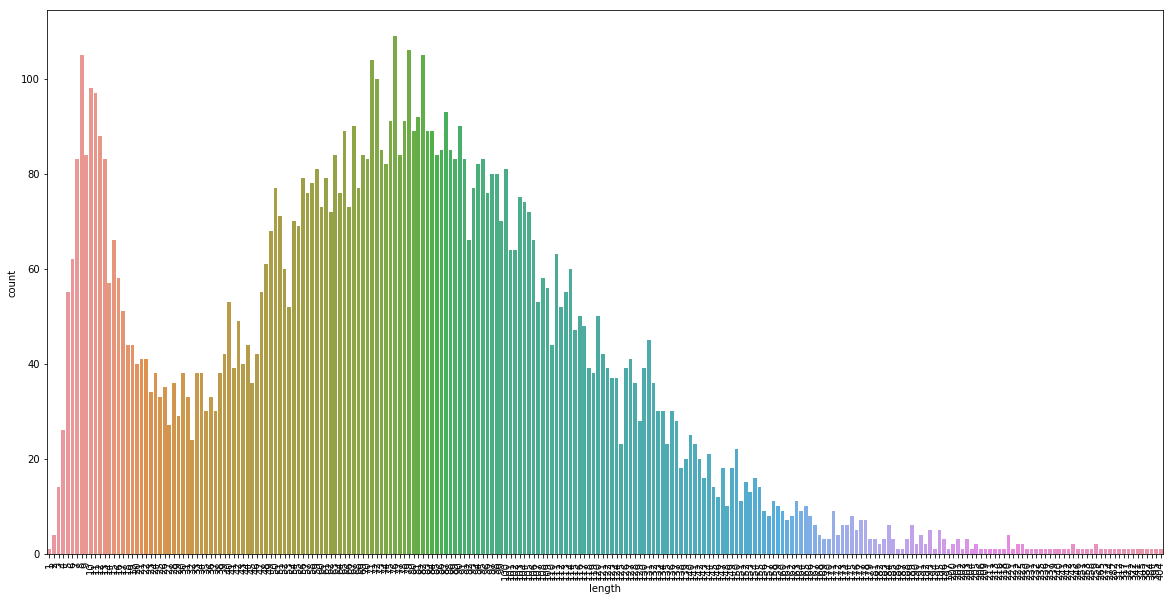

In [34]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
sns.barplot(x='length', y='count', data=pd_data, ax=ax)
plt.xticks(rotation=90);
# plt.savefig('./IMG/distribution_of_pub_length.pdf', format='pdf', bbox_inches='tight')

In [35]:
pub_concise.to_pickle('../data/pub_toks.pkl')

----

# Preprocessing scrapped `PDF`

In this section, we pre-process all the pdf that we seen in the Edinburgh Research Explorer. Some publications may not have any `pdf` (that is converted to txt (see infnet-scrapper/notebooks))

In [16]:
import os

In [31]:
collection = {}
txtdir = '../../infnet-scrapper/data/pdf2txt/txt/'
for txt in os.listdir(txtdir):
    txt_id = txt.split(".txt")[0]
    pdf = open(txtdir + txt)
    _txt = pdf.readlines()
    if len(_txt) >= 1:
        collection[txt_id] = _txt
    else:
        print(txt_id)
    pdf.close()

0ec3bdbf-5de6-4607-aba9-862cadf626a4
48877653-39f8-4f4c-8bf2-80d2af6d0be7
e4e0c9f9-970b-4224-a441-399ef977179b
03b5ea65-0e55-4ca1-bcd9-124484ae9b65
45e72a8e-99a9-4e99-8b99-c02b01bb7008
befdc0f0-f710-4775-bc29-dd5a095b8459
de681e17-1cd5-4112-b255-fba0daa1897c
fa811a41-64ab-4b9c-afa4-8fdbcd7aff98
75ab99bb-f99d-404a-82ac-121186506851
20e71cdb-5e4d-4513-a3b8-7d416e35aeb4
41899314-b749-41a4-b47e-521d4bd9b16a
85900df7-dfcd-459c-af18-3f82254e0d70
996f454b-d2ac-4bc8-9779-ca158eedcdda
be1c98b3-010d-4e25-bcc0-6b1f7910eabb
61d43d74-2d5a-4caf-a063-edbe2a178cb8
2e98e3d6-0892-49fb-984e-d000a9505975
a80888fe-96e5-4fee-ab1b-1457404e28ea
04edfd3c-35ee-44d7-a2ea-11ed5d7f7d1a
6df05941-cac1-4822-9618-0953abbf8150
cb2abed6-5d8f-43fe-b4af-0d3259d96efa
c239da37-eae7-4a63-8fa0-98cec2fdbe56
a95c419b-d44d-4ae6-892e-0a089f4d3476
fcf85516-32a8-45ae-b942-72cc8b344fcb
d28458e7-f738-4bb7-9b1f-d5dcb5ed961d
b88208d0-709e-4237-a036-cc45dc53aa75
a4caa3e2-b3ba-4bf9-abb0-1a79228c4721
40cbb66f-1c5c-46f6-b9a3-d9fa59254aad
9

In [32]:
len(collection)

2553

In [ ]:
pdf2txt = pd.DataFrame.from_dict(collection, orient='index')